Modelling and Simulation - Lab 10

Forest Fire Cellular Automata

Rushi Rajpara (201801410)

Ayan Khokhar (201801057)


In [2]:
%reset
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


In [3]:
#constants
m = 50
n = 50

In [4]:
#functions
def init_grid(n, m, tree_prob, tree_burn_prob):
    grid = [[0 for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            tmp = np.random.rand()
            if(tmp <= tree_prob):
                tmp2 = np.random.rand()
                if(tmp2 <= tree_burn_prob):
                    grid[i][j] = 2
                else:
                    grid[i][j] = 1
    grid = np.array(grid)
    return grid

def return_extended(n, m, grid):
    extgrid = [[0 for i in range(m+2)] for j in range(n+2)]
    extgrid = np.array(extgrid)

    extgrid[1:n+1,1:m+1] = grid[:,:]

    extgrid[1:n+1,m+1] = grid[:,0]
    extgrid[1:n+1,0] = grid[:,m-1]
    extgrid[0,1:m+1] = grid[n-1,:]
    extgrid[n+1,1:m+1] = grid[0,:]

    extgrid[0][0] =  extgrid[1][0]
    extgrid[n+1][0] = extgrid[n][0]
    extgrid[n+1][m+1] = extgrid[n][m+1]
    extgrid[0][m+1] = extgrid[1][m+1]

    return extgrid

def apply(n,m,grid,tree_immune_prob,probLightning=0):
    extgrid = return_extended(n,m,grid)
    tmpgrid = copy.deepcopy(extgrid)
    for i in range(1,n+1):
        for j in range(1,m+1):
            if(tmpgrid[i][j] == 1):
                if(extgrid[i-1][j] == 2 or extgrid[i][j-1] == 2 or extgrid[i][j+1] == 2 or extgrid[i+1][j] == 2):
                    tmp = np.random.rand()
                    if(tmp >= tree_immune_prob):
                        tmpgrid[i][j] = 2
                    tmp2 = np.random.rand()
                    if(tmp2 <= (1-tree_immune_prob)*probLightning):
                        tmpgrid[i][j] = 2
            elif(tmpgrid[i][j] == 2):
                tmpgrid[i][j] = 0

    extgrid = tmpgrid[1:n+1,1:m+1]

    #measure change
    cnt = 0
    for i in range(n):
        for j in range(m):
            if(extgrid[i][j] != grid[i][j]):
                cnt+=1
    
    return [extgrid,cnt]

def apply_with_neighbour_prob(n,m,grid,tree_immune_prob):
    extgrid = return_extended(n,m,grid)
    tmpgrid = copy.deepcopy(extgrid)
    for i in range(1,n+1):
        for j in range(1,m+1):
            if(tmpgrid[i][j] == 1):
                burning = 0
                if(extgrid[i-1][j] == 2):
                  burning += 1
                if(extgrid[i][j-1] == 2):
                   burning += 1
                if(extgrid[i][j+1] == 2):
                   burning += 1
                if(extgrid[i+1][j] == 2):
                   burning += 1
                burning /= 4
                tmp1 = np.random.rand()

                if(tmp1 <= burning):
                    # print(i, j, burning, tmp1)
                    tmpgrid[i][j] = 2
            elif(tmpgrid[i][j] == 2):
                tmpgrid[i][j] = 0

    extgrid = tmpgrid[1:n+1,1:m+1]

    #measure change
    cnt = 0
    for i in range(n):
        for j in range(m):
            if(extgrid[i][j] != grid[i][j]):
                cnt+=1
    
    return [extgrid,cnt]



def apply_question_1(n,m,grid,tree_immune_prob):
    extgrid = return_extended(n,m,grid)
    tmpgrid = copy.deepcopy(extgrid)

    # plt.imshow(makeColorGrid(grid))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if(tmpgrid[i][j] == 1):
                if(extgrid[i-1][j] == 2 or extgrid[i][j-1] == 2 or extgrid[i][j+1] == 2 or extgrid[i+1][j] == 2 or extgrid[i-1][j] == 3 or extgrid[i][j-1] == 3 or extgrid[i][j+1] == 3 or extgrid[i+1][j] == 3):
                    tmp = np.random.rand()
                    if(tmp >= tree_immune_prob):
                        tmpgrid[i][j] = 2
            elif(tmpgrid[i][j] == 2):
                tmpgrid[i][j] = 3
            elif(tmpgrid[i][j] == 3):
                tmpgrid[i][j] = 0

    extgrid = tmpgrid[1:n+1,1:m+1]

    #measure change
    cnt = 0
    for i in range(n):
        for j in range(m):
            if(extgrid[i][j] != grid[i][j]):
                cnt+=1
    
    return [extgrid,cnt]


def apply_with_wind(n,m,grid,tree_immune_prob,wind_direction,wind_factor):
    extgrid = return_extended(n,m,grid)
    tmpgrid = copy.deepcopy(extgrid)

    for i in range(1,n+1):
        for j in range(1,m+1):
            tmp = np.random.rand()
            #NORTH
            if(wind_direction == 'N'):
                if(tmpgrid[i][j] == 1):
                    if(extgrid[i][j-1] == 2 or extgrid[i][j+1] == 2):
                        if(tmp >= tree_immune_prob):
                            tmpgrid[i][j] = 2

                    for kk in range(0,wind_factor + 1):
                        if(i - 1 - kk >= 0 and extgrid[i-1-kk][j] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                    
                    if(wind_factor == 0 or wind_factor == 1):
                        if(extgrid[i+1][j] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                elif(tmpgrid[i][j] == 2):
                    tmpgrid[i][j] = 0
            #SOUTH
            elif(wind_direction == 'S'):
                if(tmpgrid[i][j] == 1):
                    if(extgrid[i][j-1] == 2 or extgrid[i][j+1] == 2):
                        if(tmp >= tree_immune_prob):
                            tmpgrid[i][j] = 2

                    for kk in range(0,wind_factor + 1):
                        if(i + 1 + kk <= n+1 and extgrid[i+1+kk][j] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                    
                    if(wind_factor == 0 or wind_factor == 1):
                        if(extgrid[i-1][j] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                elif(tmpgrid[i][j] == 2):
                    tmpgrid[i][j] = 0

            #EAST
            elif(wind_direction == 'E'):
                if(tmpgrid[i][j] == 1):
                    if(extgrid[i-1][j] == 2 or extgrid[i+1][j] == 2):
                        if(tmp >= tree_immune_prob):
                            tmpgrid[i][j] = 2

                    for kk in range(0,wind_factor + 1):
                        if(j + 1 + kk <= m+1 and extgrid[i][j+1+kk] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                    
                    if(wind_factor == 0 or wind_factor == 1):
                        if(extgrid[i][j-1] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                elif(tmpgrid[i][j] == 2):
                    tmpgrid[i][j] = 0
            #WEST
            elif(wind_direction == 'W'):
                if(tmpgrid[i][j] == 1):
                    if(extgrid[i-1][j] == 2 or extgrid[i+1][j] == 2):
                        if(tmp >= tree_immune_prob):
                            tmpgrid[i][j] = 2

                    for kk in range(0,wind_factor + 1):
                        if(j - 1 +-kk >= 0 and extgrid[i][j-1-kk] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                    
                    if(wind_factor == 0 or wind_factor == 1):
                        if(extgrid[i][j+1] == 2):
                            if(tmp >= tree_immune_prob):
                                tmpgrid[i][j] = 2
                elif(tmpgrid[i][j] == 2):
                    tmpgrid[i][j] = 0

    extgrid = tmpgrid[1:n+1,1:m+1]

    #measure change
    cnt = 0
    for i in range(n):
        for j in range(m):
            if(extgrid[i][j] != grid[i][j]):
                cnt+=1
    
    return [extgrid,cnt]

def makeColorGrid(grid):
    n = grid.shape[0]
    
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i][j] == 1):
                colorGrid[i][j][0] = 0.1
                colorGrid[i][j][1] = 0.75
                colorGrid[i][j][2] = 0.02
            if (grid[i, j] == 2):
                colorGrid[i][j][0] = 0.6
                colorGrid[i][j][1] = 0.2
                colorGrid[i][j][2] = 0.1                
    return colorGrid

#For making videos
def animate_video(grids, name):  
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)

    fig1 = plt.figure(1)
    plt.axis('off')

    gridplots = plt.imshow(makeColorGrid(grids[0][:][:]), interpolation='nearest', animated=True)

    def updateGrid(i, *args):
        gridplots.set_array(makeColorGrid(grids[i][:][:]))
        return gridplots,

    grid_animation = animation.FuncAnimation(fig1, updateGrid, save_count = len(grids), 
                                    interval=50, blit=False)


    grid_animation.save(name, writer=writer)
    HTML(grid_animation.to_html5_video())
    plt.close(1)


No handles with labels found to put in legend.


slope: 
 [   0.          -30.66523051  131.46736807 -146.51128302   53.81160415]
intercept : 
 -2.6600565776366025


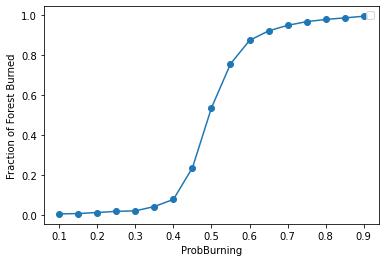

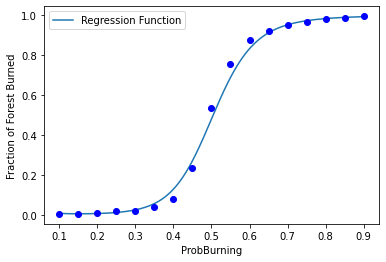

In [ ]:
#Question 1
percent_burn = []
probs = []

for prob in range(10,91,5):
    prob = prob/100
    probs.append(1-prob)
    #do 10 simulations
    pb = []
    for sim in range(0,10):
        grid = init_grid(n,m,1,0.005)
        cnt = 0
        t = 0
        tot = 0
        saved = 0

        for i in range(n):
            for j in range(m):
                if(grid[i][j] == 1 or grid[i][j] == 2):
                    tot += 1

        while(1):
            grid,cnt = apply(n,m,grid,prob)
            if(cnt == 0):
                break;
            t += 1
        
        for i in range(n):
            for j in range(m):
                if(grid[i][j] == 1):
                    saved+=1

        pb.append((tot - saved)/tot)
    percent_burn.append(np.median(pb))

plt.plot(probs,percent_burn,marker = 'o')
plt.xlabel('ProbBurning')
plt.ylabel('Fraction of Forest Burned')
plt.legend()

# Regression (model used =  1/(1 + e^(- ax^4 - bx^3 - cx^2 - dx - e)))

probs = np.array(probs)
probs2 = probs
pb = np.array(percent_burn)
pb2 = np.array(percent_burn)
for i in range(len(pb)):
    pb[i] = math.log((pb[i])/(1.0-pb[i]))    

probs = probs.reshape(-1,1)
PY = PolynomialFeatures(degree = 4)
probs = PY.fit_transform(probs)
PY.fit(probs,pb)

LR = LinearRegression()
results = LR.fit(probs,pb)
print('slope: \n', LR.coef_)
print('intercept : \n', LR.intercept_)

probs_new = np.arange(0.1,0.9,0.001)
y_axis = []
for x in probs_new:
    tmp = 1/(1 + np.exp(-LR.coef_[4]*x**4 -LR.coef_[3]*x**3 -LR.coef_[2]*x**2 -LR.coef_[1]*x - LR.intercept_))
    y_axis.append(tmp)

plt.figure()
plt.plot(probs_new,y_axis,label = 'Regression Function')
for i in range(len(pb2)):
    plt.plot(probs[i][1],pb2[i],marker = 'o',color = 'b')
plt.xlabel('ProbBurning')
plt.ylabel('Fraction of Forest Burned')
plt.legend()

10
20
30
40
50
60
70
80
90
100


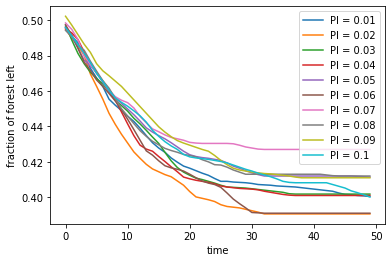

In [ ]:
#change in lightning
# del grid
probs = []
time = 50


for prob in range(10,101,10):
    print(prob)
    density = []
    t = []
    prob = prob/1000
    for sim in range(20):
        grid = init_grid(n,m,0.5,0.005)
        density1 = []
        for i in range(time):
            if(sim == 0):
                t.append(i)
            cnt = 0
            for i in range(n):
                for j in range(m):
                    if(grid[i][j] == 1):
                        cnt+=1
            den = cnt/(n*m)
            density1.append(den)
            grid = apply(n,m,grid,0.00,prob)[0]
        density.append(density1)
    
    toplt = np.median(density,axis = 0)
    t = np.array(t)
    plt.plot(t,toplt,label = 'Pl = ' + str(prob))
    plt.xlabel('time')
    plt.ylabel('fraction of forest left')

plt.legend()

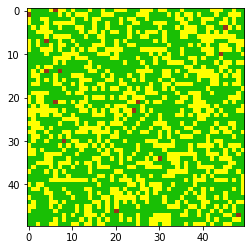

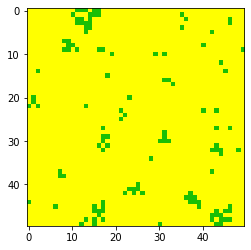

In [5]:
# Question 2, Exercise 1 : A tree takes two time steps to burn completely.
t = 200
forest  = init_grid(n, m, 0.6, 0.01)
forestNew = np.zeros((m, n))
grids = np.zeros((t + 2, n, n))
grids[0, :, :] = forest
for it in range(1, t + 1):
          # forestExt = return_extended(n, m, forest)
          forestNew, cnt = apply_question_1(n,m,grids[it-1, :, :],0.01)
          grids[it, :, :] = forestNew

for it in range(1, t+1):
  for i in range(n):
    for j in range(m):
        if grids[it, i, j] == 3:
          grids[it,i,j] = 2

animate_video(grids, 'Ex1.mp4')
plt.imshow(makeColorGrid(grids[0]))
plt.figure()
# plt.imshow(grids[20], cmap='gray',  vmin=0, vmax=2)
# plt.imshow(makeColorGrid(grids[40]))
# plt.figure()
plt.imshow(makeColorGrid(grids[t]))


Text(0, 0.5, 'Tree density')

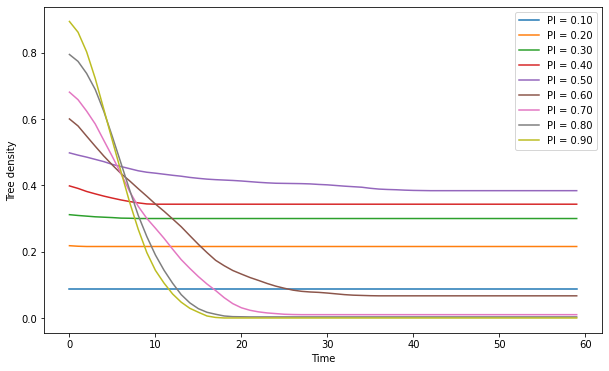

In [ ]:
# Plots of Tree-Density vs Time 

plt.figure(figsize=(10,6))
time = 60
start_density = 0.1
for pi in range(9):
    t = 60
    forest  = init_grid(n, m, start_density, 0.01)
    forestNew = np.zeros((m, n))
    grids = np.zeros((t + 2, n, n))
    grids[0, :, :] = forest
    for it in range(1, t + 1):
              # forestExt = return_extended(n, m, forest)
              forestNew, cnt = apply_question_1(n,m,grids[it-1, :, :],0.01)
              grids[it, :, :] = forestNew

    for it in range(1, t+1):
      for i in range(n):
        for j in range(m):
            if grids[it, i, j] == 3:
              grids[it,i,j] = 2

    density_tree = []
    t_axis = []
    for i in range(time):
        treecnt = 0
        t_axis.append(i)
        for x in range(n):
            for y in range(m):
                treecnt += (grids[i][x][y] == 1)
        density_tree.append(treecnt/(m*n))
    plt.plot(t_axis, density_tree, label="Pl = %0.2f" % (start_density))
    start_density += 0.1
plt.legend()
plt.xlabel("Time")
plt.ylabel("Tree density")



Text(0, 0.5, 'Final tree density')

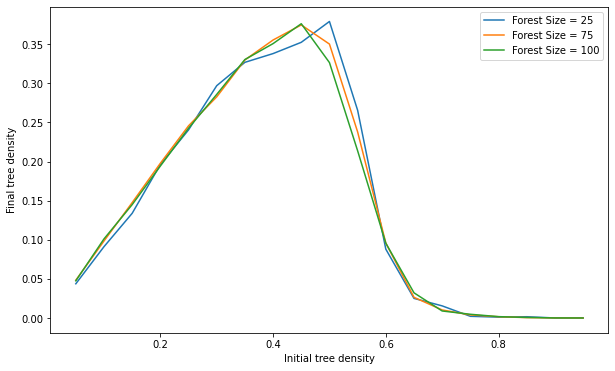

In [ ]:
#Final Tree density vs Initial Tree density

plt.figure(figsize=(10,6))
size = [25, 75, 100]
init_density = []
fin_density = []
runs = 3
time = 40
for sz in range(len(size)):
    init_density = []
    fin_density = []
    tree_density = 0.05
    
    while tree_density <= 1:
        init_density.append(tree_density)
        density = 0
        # Average taking of many experiments
        for run in range(runs):
            t = 40
            forest  = init_grid(size[sz], size[sz], tree_density, 0.01)
            forestNew = np.zeros((size[sz], size[sz]))
            grids = np.zeros((t + 2, size[sz], size[sz]))
            grids[0, :, :] = forest
            for it in range(1, t + 1):
                      # forestExt = return_extended(n, m, forest)
                      forestNew, cnt = apply_question_1(size[sz],size[sz],grids[it-1, :, :],0.01)
                      grids[it, :, :] = forestNew

            for it in range(1, t+1):
              for i in range(size[sz]):
                for j in range(size[sz]):
                    if grids[it, i, j] == 3:
                      grids[it,i,j] = 2
            count = 0
            for x in range(size[sz]):
                for y in range(size[sz]):
                    if grids[time - 1][x][y] == 1:
                        count += 1
            density += count / (size[sz] * size[sz])
        density /= runs
        fin_density.append(density)
        tree_density += 0.05
    
    plt.plot(init_density, fin_density, label=f"Forest Size = {size[sz]}")

plt.legend()
plt.xlabel("Initial tree density")
plt.ylabel("Final tree density")

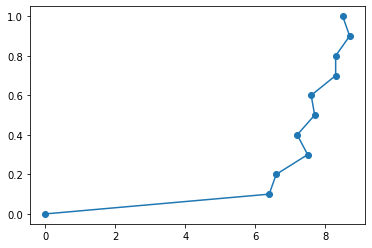

In [ ]:
# Question 2, Exercise 2 : A tree catches on fire from neighboring trees with a probability proportional
# to the number of neighbors on fire. 

ttaken = []
probs = []

for prob in range(0,101,10):
    prob = prob/100
    probs.append(prob)
    #do 100 simulations
    tarr = []
    for sim in range(0,10):
        grid = init_grid(n,m,prob,0.005)
        cnt = 0
        t = 0
        while(1):
            grid,cnt = apply_with_neighbour_prob(n,m,grid,0.2)
            if(cnt == 0):
                break;
            t += 1
        tarr.append(t)
    ttaken.append(np.mean(tarr))

plt.plot(ttaken,probs,marker = 'o')

Text(0, 0.5, 'Tree density')

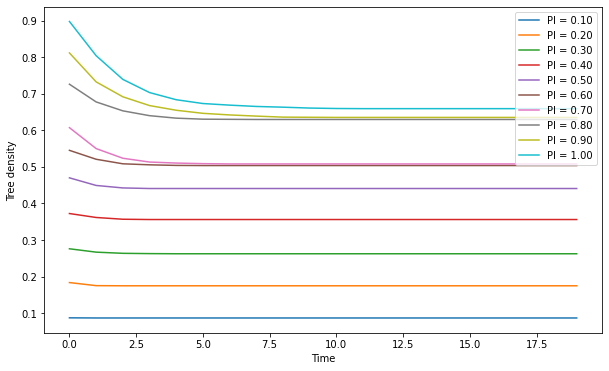

In [ ]:
# Question 2, Exercise 2 : A tree catches on fire from neighboring trees with a probability proportional
# to the number of neighbors on fire. 
# Plots of Tree-Density vs Time 

plt.figure(figsize=(10,6))
time = 20
start_density = 0.1
for pi in range(10):
    t = 20
    forest  = init_grid(n, m, start_density, 0.1)
    forestNew = np.zeros((m, n))
    grids = np.zeros((t + 2, n, n))
    grids[0, :, :] = forest
    for it in range(1, t + 1):
              # forestExt = return_extended(n, m, forest)
              # plt.figure()
              # plt.imshow(makeColorGrid(grids[it-1]))
              forestNew, cnt = apply_with_neighbour_prob(n,m,grids[it-1, :, :],0.01)
              grids[it, :, :] = forestNew

              # plt.figure()
              # plt.imshow(makeColorGrid(grids[it]))

    density_tree = []
    t_axis = []
    for i in range(time):
        treecnt = 0
        t_axis.append(i)
        for x in range(n):
            for y in range(m):
                treecnt += (grids[i][x][y] == 1)
        density_tree.append(treecnt/(m*n))
    plt.plot(t_axis, density_tree, label="Pl = %0.2f" % (start_density))
    start_density += 0.1
plt.legend()
plt.xlabel("Time")
plt.ylabel("Tree density")



In [ ]:
#Question 10 part (a) Including the Wind Effect

grid = []
grid.append(init_grid(n,m,1,0.0002))
while(1):
    [tmp_grid,cnt] = apply_with_wind(n,m,grid[len(grid) - 1],0.25,'N',1)
    grid.append(tmp_grid)
    if(cnt == 0):
        break

animate_video(grid, 'Ex10a.mp4')

In [ ]:
#Question 10 part(b)

grid = []
grid.append(init_grid(n,m,0.7,0.001))

cnt1 = 0
for i in range(n):
    for j in range(m):
        if(grid[0][i][j] == 2):
            cnt1+=1
while(1):
    tmp = np.random.randint(1,4)
    direction = ''
    if(tmp == 1):
        direction = 'N'
    elif(tmp == 2):
        direction = 'S'
    elif(tmp == 3):
        direction = 'E'
    elif(tmp == 4):
        direction = 'W'

    i = 0
    fl = 0
    while(i < 3):
        i += 1
        [tmp_grid,cnt] = apply_with_wind(n,m,grid[len(grid) - 1],0.25,direction,1)
        grid.append(tmp_grid)
        if(cnt == 0):
            fl = 1
            break
    if(fl == 1):
        break

animate_video(grid, 'Ex10b.mp4')

In [ ]:
#Question 10 part(c)
main_arr = []
main_grid = init_grid(n,m,0.3,0)
main_grid[n//2][m//2] = 2
for i in range(0,3):
    arr = []
    for sim in range(0,10):
        grid = main_grid
        cnt = 0
        cnttot = 0
        while(1):
            [grid,cnt] = apply_with_wind(n,m,grid,0.1,'N',i)
            if(cnt == 0):
                break;
            # plt.figure()
            # plt.imshow(makeColorGrid(grid))
        for i in range(n):
            for j in range(m):
                if(grid[i][j] == 0 and main_grid[i][j] == 1):
                    cnt+=1
                if(main_grid[i][j] == 1):
                    cnttot+=1
        arr.append(cnt/cnttot)
    main_arr.append(np.median(arr))

print(main_arr)

[0.16753926701570682, 0.19240837696335078, 0.1537958115183246]
